In [38]:
from google.colab import drive
drive.mount('/content/gdrive') # 點擊網址，選擇 Google 帳號登入，然後將授權碼貼回輸入框中

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [39]:
%pwd
%ls

build/       data/  figure_1.png    LICENSE    setup.py  SOMPY.egg-info/
Capture.PNG  dist/  figure_2-4.png  README.md  sompy/


In [0]:
!ln -fs /content/gdrive/My\ Drive/Colab\ Notebooks/Datascience /app

In [41]:
#%cd /content/gdrive/My\ Drive/Colab\ Notebooks/Datascience
!git clone https://github.com/hhl60492/SOMPY_robust_clustering.git
%cd SOMPY_robust_clustering
! python setup.py install

Cloning into 'SOMPY_robust_clustering'...
remote: Enumerating objects: 185, done.
remote: Total 185 (delta 0), reused 0 (delta 0), pack-reused 185
Receiving objects: 100% (185/185), 1.66 MiB | 9.50 MiB/s, done.
Resolving deltas: 100% (74/74), done.
/content/SOMPY_robust_clustering/SOMPY_robust_clustering
running install
running bdist_egg
running egg_info
writing SOMPY.egg-info/PKG-INFO
writing dependency_links to SOMPY.egg-info/dependency_links.txt
writing requirements to SOMPY.egg-info/requires.txt
writing top-level names to SOMPY.egg-info/top_level.txt
writing manifest file 'SOMPY.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/sompy
copying build/lib/sompy/decorators.py -> build/bdist.linux-x86_64/egg/sompy
creating build/bdist.linux-x86_64/egg/sompy/visualization
copying build/lib/sompy/visualization/hitmap.

In [0]:
#%cd /app

In [0]:
import matplotlib.pylab as plt
%matplotlib inline
# import sompy as sompy
import pandas as pd
import numpy as np
from time import time
import sompy

In [44]:
Data1 = pd.DataFrame({ 'v1': [14,22,15,20,30,18,32],
                    'v2': [15,28,18,30,35,20,30]},
                   index = ['Y1','Y2','Y3','Y4','Y5','Y6','Y7']
          )
Data1

,v1,v2
Y1,14,15
Y2,22,28
Y3,15,18
Y4,20,30
Y5,30,35
Y6,18,20
Y7,32,30


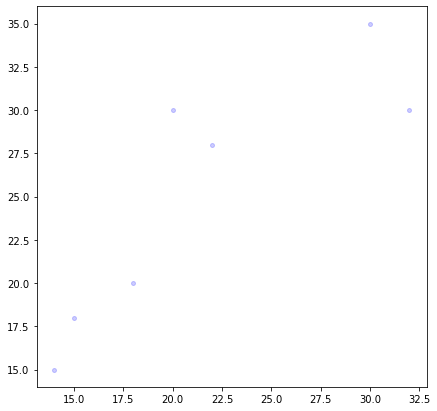

In [45]:
fig = plt.figure()
plt.plot(Data1['v1'],Data1['v2'],'ob',alpha=0.2, markersize=4)
fig.set_size_inches(7,7)

In [46]:
mapsize = [20,20]
som = sompy.SOMFactory.build(Data1, mapsize, mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='pca', neighborhood='gaussian', training='batch', name='sompy')  # this will use the default parameters, but i can change the initialization and neighborhood methods
som.train(n_job=1, verbose='info')  # verbose='debug' will print more, and verbose=None wont print anything

Streaming output truncated to the last 5000 lines.
 epoch: 1505 ---> elapsed time:  0.110000, quantization error: 0.000001

 epoch: 1506 ---> elapsed time:  0.109000, quantization error: 0.000001

 epoch: 1507 ---> elapsed time:  0.109000, quantization error: 0.000001

 epoch: 1508 ---> elapsed time:  0.110000, quantization error: 0.000001

 epoch: 1509 ---> elapsed time:  0.109000, quantization error: 0.000001

 epoch: 1510 ---> elapsed time:  0.108000, quantization error: 0.000001

 epoch: 1511 ---> elapsed time:  0.109000, quantization error: 0.000001

 epoch: 1512 ---> elapsed time:  0.111000, quantization error: 0.000001

 epoch: 1513 ---> elapsed time:  0.111000, quantization error: 0.000000

 epoch: 1514 ---> elapsed time:  0.109000, quantization error: 0.000000

 epoch: 1515 ---> elapsed time:  0.110000, quantization error: 0.000000

 epoch: 1516 ---> elapsed time:  0.109000, quantization error: 0.000000

 epoch: 1517 ---> elapsed time:  0.109000, quantization error: 0.000000



In [47]:
# The quantization error: average distance between each data vector and its BMU.
# The topographic error: the proportion of all data vectors for which first and second BMUs are not adjacent units.
topographic_error = som.calculate_topographic_error()
quantization_error = np.mean(som._bmu[1])
print ("Topographic error = %s; Quantization error = %s" % (topographic_error, quantization_error))

Topographic error = 0.0; Quantization error = 4.3790243503564586e-07


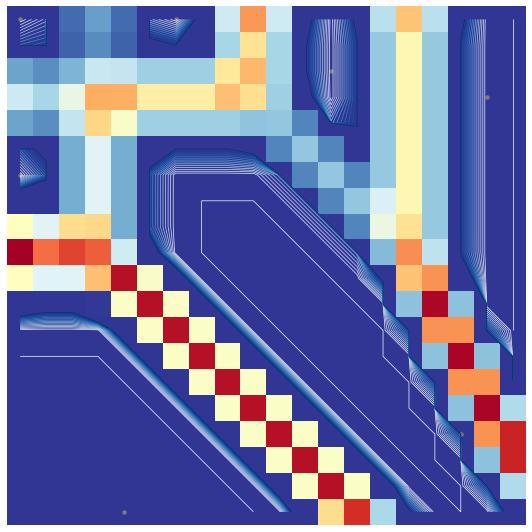

([], array([[2.94365063e-06, 2.86739445e-04, 5.76828471e-02, 1.14795812e-01,
         5.76841862e-02, 2.88132880e-04, 6.24319084e-06, 1.17863269e-03,
         2.37832475e-01, 4.73313359e-01, 2.37829295e-01, 1.17615420e-03,
         5.81584647e-06, 1.05134706e-03, 2.12603834e-01, 4.23110457e-01,
         2.12604060e-01, 1.05157729e-03, 2.69258240e-06, 0.00000000e+00],
        [5.88386306e-04, 6.98675428e-04, 4.66168745e-02, 9.25174851e-02,
         4.70378684e-02, 1.12143803e-03, 8.95964462e-04, 1.83426141e-03,
         1.91151064e-01, 3.78871516e-01, 1.90263355e-01, 9.40923359e-04,
         4.65267717e-06, 8.41077650e-04, 1.70083067e-01, 3.38488366e-01,
         1.70083248e-01, 8.41261830e-04, 2.15406592e-06, 0.00000000e+00],
        [1.18880489e-01, 9.53336556e-02, 1.41666388e-01, 2.30049893e-01,
         2.26773098e-01, 1.80861670e-01, 1.80635791e-01, 1.81568003e-01,
         3.69544240e-01, 4.37998041e-01, 1.90270620e-01, 9.41391904e-04,
         4.65267717e-06, 8.41077650e-04, 1.70

In [48]:
# U-matrix plot
from sompy.visualization.umatrix import UMatrixView

umat  = UMatrixView(width=10,height=10,title='U-matrix')
umat.show(som)

In [49]:
print(som.component_names)

[['Variable-1' 'Variable-2']]


In [0]:
som.component_names = ['v1','v2']
#v = sompy.mapview.View2DPacked(50, 50, 'test',text_size=14)  